# Mathematics and Statistics in Python

<a href="../../_slides/chapter-9-slides.html">See also the slides that summarize a portion of this content.</a>


## Math in Python

Having had CS230, you are surely familiar with Python's built-in math operators `+`, `-`, `*`, `/`, and `**`.  You're probably also familiar with the fact that Python has a `math` module that you can use for things like trigonometry.

In [1]:
import math
math.cos( 0 )

1.0

I list here just a few highlights from that module that are relevant for statistical computations.

`math.exp(x)` is $e^x$, so the following computes $e$.

In [2]:
math.exp( 1 )

2.718281828459045

Natural logarithms are written $\ln x$ in mathematics, but just `log` in Python.

In [3]:
math.log( 10 )  # natural log of 10

2.302585092994046

There are some other functions useful for data work (like `math.dist()`, `math.comb()`, and `math.perm()`) coming in Python 3.8, but most Python tools (like pandas, NumPy, and SciPy) haven't yet been udpated to work with Python 3.8.  So I do not cover those functions here, and I recommend that you stick with Python 3.7 for now.

## Naming mathematical variables

In programming, we almost never name variables with unhelpful names like `k` and `x`, because later readers of the code (or even ourselves reading it in two months) won't know what `k` and `x` actually do.  The one exception to this is in mathematics, where it is normal to use single-letter variables, and indeed sometimes the letters matter.

**Example 1:**  The quadratic formula is almost always written using the letters $a$, $b$, and $c$.  Yes, names like `x_squared_coefficient`, `x_coefficient`, and `constant` are more descriptive, but they would lead to much uglier code that's not what anyone expects.  Compare:

In [4]:
# not super easy to read, but not bad:
def quadratic_nice ( a, b, c ):
    return ( ( -b + ( b**2 - 4*a*c )**0.5 ) / ( 2*a ),
             ( -b - ( b**2 - 4*a*c )**0.5 ) / ( 2*a ) )

# oh my make it stop:
def quadratic_bad ( x_squared_coefficient, x_coefficient, constant ):
    return (
        ( -x_coefficient + \
             ( x_coefficient**2 - 4*x_squared_coefficient*constant )**0.5 ) \
           / ( 2*x_squared_coefficient ),
        ( -x_coefficient - \
             ( x_coefficient**2 - 4*x_squared_coefficient*constant )**0.5 ) \
           / ( 2*x_squared_coefficient )
    )

# of course both work fine:
quadratic_nice(3,-9,6), quadratic_bad(3,-9,6)

((2.0, 1.0), (2.0, 1.0))

But the first one is so much easier to read.

**Example 2:**  Statistics always uses $\mu$ for the mean of a population and $\sigma$ for its standard deviation.  If we wrote code where we used `mean` and `standard_deviation` for those, that wouldn't be hard to read, but it wouldn't be as clear, either.

Interestingly, you can actually type Greek letters into Python code and use them as variable names!  In Jupyter, just type a backslash (`\`) followed by the name of the letter (such as `mu`) and then press the Tab key.  It will replace the code `\mu` with the actual letter $\mu$.  I've done so in the example code below.

In [5]:
def normal_pdf ( μ, σ, x ):
    """The value of the probability density function for
    the normal distribution N(μ,σ^2), with mean μ and
    variance σ^2."""
    shifted = ( x - μ ) / σ
    return math.exp( -shifted**2 / 2.0 ) \
         / math.sqrt( 2*math.pi ) / σ

normal_pdf( 10, 2, 15 )

0.00876415024678427

## But what about NumPy?

Most data science projects in Python import both pandas and NumPy.  Since NumPy implements tons of mathematical tools, why bother using the ones in Python's built-in `math` module?  Well, on the one hand, NumPy doesn't have *everything*; for instance, the `math.comb()` and `math.perm()` functions mentioned above don't exist in NumPy.  But when you *can* use NumPy, you *should,* for the following important reason.

```{admonition} Big Picture
---
class: alert alert-primary
---
All the functions in NumPy are *vectorized,* meaning that they will automatically apply themselves to every element of a NumPy array.  For instance, you can just as easily compute `square(5)` (and get 25) as you can compute `square(x)` if `x` is a list of 1000 entries.  NumPy notices that you provided a list of things to square, and it squares them all.  What are the benefits to vectorization?

 1. Using vectorization saves you *the work of writing loops.*
 2. Using vectorization saves the readers of your code *the work of reading and understanding loops.*
 2. If you had to write a loop to apply a Python function (like `lambda x: x**2`) to a list of 1000 entries, then the loop would (obviously) run in Python.  Although Python is a very convenient language to code in, it does not produce very fast-running code.  Tools like NumPy are written in languages like C++, which are less convenient to code in, but produce faster-running results.  So if you can have NumPy automatically loop over your data, rather than writing a loop in Python, *the code will execute faster.*
```

We will return to vectorization and loops in Chapter 11 of these notes.  For now, let's just run a few NumPy functions.  In each case, notice that we give it an array as input, and it automatically knows that it should take action on each entry in the array.

In [6]:
# Create an array of 30 random numbers to work with.
import numpy as np
values = np.random.rand( 30 )
values

array([0.18749897, 0.07316104, 0.75626655, 0.61111431, 0.09289181,
       0.3180047 , 0.79238383, 0.72835593, 0.11764028, 0.3429926 ,
       0.75055687, 0.92145617, 0.53068135, 0.40630813, 0.2895452 ,
       0.07446345, 0.61029725, 0.36745468, 0.05034605, 0.68159722,
       0.91673431, 0.75455441, 0.21342458, 0.21834192, 0.18463526,
       0.10587757, 0.17686841, 0.20370967, 0.25734605, 0.69745677])

In [7]:
np.around( values, 2 ) # round to 2 decimal digits

array([0.19, 0.07, 0.76, 0.61, 0.09, 0.32, 0.79, 0.73, 0.12, 0.34, 0.75,
       0.92, 0.53, 0.41, 0.29, 0.07, 0.61, 0.37, 0.05, 0.68, 0.92, 0.75,
       0.21, 0.22, 0.18, 0.11, 0.18, 0.2 , 0.26, 0.7 ])

In [8]:
np.exp( values ) # compute e^x for each x in the array

array([1.20622901, 1.07590379, 2.13030796, 1.84248335, 1.09734301,
       1.37438271, 2.2086552 , 2.07167183, 1.12483941, 1.40915834,
       2.11817924, 2.51294701, 1.70009027, 1.50126507, 1.33581982,
       1.07730597, 1.84097855, 1.44405436, 1.05163496, 1.97703298,
       2.50110918, 2.12666368, 1.23791014, 1.24401234, 1.20277966,
       1.11168577, 1.19347403, 1.22594217, 1.29349267, 2.00863778])

In [9]:
np.square( values ) # square each value

array([0.03515587, 0.00535254, 0.57193909, 0.3734607 , 0.00862889,
       0.10112699, 0.62787213, 0.53050236, 0.01383924, 0.11764392,
       0.56333562, 0.84908148, 0.2816227 , 0.1650863 , 0.08383642,
       0.00554481, 0.37246274, 0.13502294, 0.00253473, 0.46457478,
       0.84040179, 0.56935235, 0.04555005, 0.04767319, 0.03409018,
       0.01121006, 0.03128243, 0.04149763, 0.06622699, 0.48644595])

Notice that this makes it very easy to compute certain mathematical formulas.  For example, when we want to measure the quality of a model, we might compute the RSSE, or Root Sum of Squared Errors, that is, the square root of the sum of the squared differences between each actual data value $y_i$ and its predicted value $\hat y_i$.  In math, we write it like this:

$$ \text{RSSE} = \sqrt{\sum_{i=1}^n (y_i-\hat y_i)^2} $$

The summation symbol lets you know that a loop will take place.  But in NumPy, we can do it without writing any loops.

In [10]:
ys    = np.array( [ 1, 2, 3, 4, 5 ] )   # made up data
yhats = np.array( [ 2, 1, 0, 3, 4 ] )   # also made up
RSSE  = np.sqrt( np.sum( np.square( ys - yhats ) ) )
RSSE

3.605551275463989

Notice how the NumPy code also reads just like the English:  It's the square root of the sume of the squared differences; the code literally says that in the formula itself!  If we had had to write it in pure Python, we would have used either a loop or a list comprehension, like in the example below.

In [11]:
RSSE = math.sqrt( sum( [ ( ys[i] - yhats[i] )**2 for i in range(len(ys)) ] ) ) # not as readable
RSSE

3.605551275463989

A comprehensive list of NumPy's math routines appear [in the NumPy documentation](https://numpy.org/doc/stable/reference/routines.math.html).

## Binding function arguments

Many functions in statistics have two types of parameters.  Some of the parameters you change very rarely, and others you change all the time.

**Example 1:**  Consider the `normal_pdf` function whose code appears earlier in this chapter.  It has three parameters, $\mu$, $\sigma$, and $x$.  You'll probably have a particular normal distribution you want to work with, so you'll choose $\mu$ and $\sigma$, and then you'll want to use the function on many different values of $x$.  So the first two parameters we choose just once, and the third parameter changes all the time.

**Example 2:**  Consider fitting a linear model $\beta_0+\beta_1x$ to some data $x_1,x_2,\ldots,x_n$.  That linear model is technically a function of three variables; we might write it as $f(\beta_0,\beta_1,x)$.  But when we fit the model to the data, then $\beta_0$ and $\beta_1$ get chosen, and we don't change them after that.  But we might plug in hundreds or even thousands of different $x$ values to $f$, using the same $\beta_0$ and $\beta_1$ values each time.

Programmers have a word for this; they call it *binding* the arguments of a function.  Binding allows us to tell Python that we've chosen values for some parameters and won't be changing them; Python can thus give us a function with fewer parameters, to make things simpler.  Python does this with a tool called `partial` in its `functools` module.  Here's how we would apply it to the `normal_pdf` function.

In [12]:
from functools import partial

# Let's say I want the standard normal distribution, that is,
# I want to fill in the values μ=0 and σ=1 once for all.
my_pdf = partial( normal_pdf, 0, 1 )

# now I can use that on as many x inputs as I like, such as:
my_pdf( 0 ), my_pdf( 1 ), my_pdf( 2 ), my_pdf( 3 ), my_pdf( 4 )

(0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537)

In fact, SciPy's built-in random number generating procedures let you use them either by binding arguments or not, at your preference.  For instance, to generate 10 random floating point values between 0 and 100, we can do the following.  (The `rvs` function stands for "random values.")

In [13]:
import scipy.stats as stats
stats.uniform.rvs( 0, 100, size=10 )

array([70.53359236, 70.70208825, 64.38653695, 97.53998752, 54.51977284,
       12.43869692, 84.11073797, 52.91658355, 57.87811329,  9.39498666])

Or we can use built-in SciPy functionality to bind the first two arguments and create a specific random variable, then call `rvs` on that.

In [14]:
X = stats.uniform( 0, 100 )  # make a random variable
X.rvs( size=10 )             # generate 10 values from it

array([81.83819128, 52.37003328, 25.64223321, 53.01549829, 37.87673431,
       61.76143048,  6.56946446, 66.09759891, 51.48709127, 78.97233618])

The same random variable can, of course, be used to create more values later.

The `partial` tool built into Python only works if you want to bind the *first* arguments of the function.  If you need to bind later ones, then you can do it yourself using a `lambda`, as in the following example.

In [15]:
def subtract ( a, b ):   # silly little example function
    return a - b

subtract_1 = lambda a: subtract( a, 1 )  # bind second argument to 1

subtract_1( 5 )

4

We will also use the concept of binding function parameters when we come to curve fitting at the end of this chapter.

## GB213 in Python

You can refer at any time to one of the appendices in these course notes, a [review of GB213, but in Python](GB213-review-in-Python).

Topics covered there:

 * Discrete and continuous random variables
    * creating
    * plotting
    * generating random values
    * computing probabilities
    * computing statistics
 * Hypothesis testing for a population mean
    * one-sided
    * two-sided
 * Simple linear regression (one predictor variable)
    * creating the model from data
    * computing $R$ and $R^2$
    * visualizing the model

Topics not covered in that chapter, but that you may have seen in GB213:

 * Basic probability (covered in every GB213 section)
 * ANOVA (covered in some GB213 sections)
 * $\chi^2$ tests (covered in some GB213 sections)

```{admonition} Learning on Your Own - Pingouin
---
class: alert alert-danger
---
The GB213 review appendix that I linked to above uses the very popular Python statistics tools `statsmodels` and `scipy.stats`.  But there is a relatively new toolkit called Pingouin; it's not as popular (yet?) but it has some advantages over the other two.  See [this blog post](https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c) for an introduction and consider a tutorial, video, presentation, or notebook for the class that showcases when you might prefer Pingouin to the others, and how to use it in such cases.  Be sure to include the installation procedure.
```


## Curve fitting in general

The final topic covered in the GB213 review mentioned above is simple linear regression, which fits a line to a set of (two-dimensional) data points.  But Python's scientific tools permit you to handle much more complex models.  We cannot cover mathematical modeling in detail in MA346, because it can take several courses on its own, but you can learn more about regression modeling in particular in [MA252 at Bentley](https://catalog.bentley.edu/search/?P=MA%20252).  But we will cover how to fit an arbitrary curve to data in Python.

### 1. Say we have some data

We will assume you have data stored in a pandas DataFrame, and we will lift out just two columns of the DataFrame, one that will be used as our $x$ values (independent variable), and the other as our $y$ values (dependent variable).  I'll make up some data here just for use in this example.

In [16]:
# example data only, totally made up:
import pandas as pd
df = pd.DataFrame( {
    'salt used (x)' :     [ 2.1, 2.9, 3.1, 3.5, 3.7, 4.6 ],
    'ice remaining (y)' : [ 7.9, 6.5, 6.5, 6.0, 6.2, 6.0 ]
} )
df

,salt used (x),ice remaining (y)
0,2.1,7.9
1,2.9,6.5
2,3.1,6.5
3,3.5,6.0
4,3.7,6.2
5,4.6,6.0


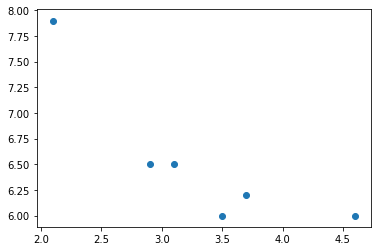

In [17]:
import matplotlib.pyplot as plt
xs = df['salt used (x)']
ys = df['ice remaining (y)']
plt.scatter( xs, ys )
plt.show()

### 2. Choose a model

Curve-fitting is a powerful tool, and it's easy to misuse it by fitting to your data a model that doesn't make sense for that data.  A mathematical modeling course can help you learn how to assess the appropriateness of a given type of line, curve, or more complex model for a given situation.  But for this small example, let's pretend that we know that the following model makes sense, perhaps because some earlier work with salt and ice had success with it.  (Again, keep in mind that this example is really, truly, totally made up.)

$$ y=\frac{\beta_0}{\beta_1+x}+\beta_2 $$

We will use this model.  Obviously, it's not the equation of a line, so linear regression tools like those covered in the GB213 review notebook won't be sufficient.  To begin, we code the model as a Python function taking inputs in this order: first, $x$, then after it, all the model parameters $\beta_0,\beta_1$, and so on, however many model parameters there happen to be (in this case three).


In [18]:
def my_model ( x, β0, β1, β2 ):
    return β0 / ( β1 + x ) + β2

### 3. Have SciPy find the $\beta$s

This step is called "fitting the model to your data."  It finds the values of $\beta_0,\beta_1,\beta_2$ that make the most sense for the particular $x$ and $y$ adata values that you have.  Using the language from earlier in this chapter, SciPy will tell us how to *bind values to the parameters* $\beta_0,\beta_1,\beta_2$ of `my_model` so that the resulting function, which just takes `x` as input, is the one best fit to our data.

For example, if we picked our own values for the model parameters, we would probably guess poorly.  Let's try guessing $\beta_0=1,\beta_1=2,\beta_2=3$.

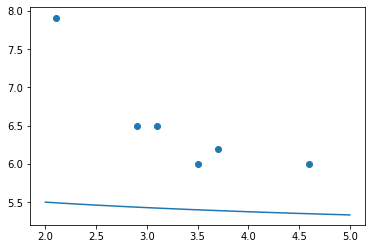

In [19]:
guess_model = lambda x: my_model( x, 3, 4, 5 )

import numpy as np
many_xs = np.linspace( 2, 5, 100 )

plt.scatter( xs, ys )
plt.plot( many_xs, guess_model( many_xs ) )
plt.show()

Yyyyyyeah...  Our model is nowhere near the data.  That's why we need SciPy to find the $\beta$s.  Here's how we ask it to do so.  You start with your own guess for the parameters, and SciPy will improve it.

In [20]:
from scipy.optimize import curve_fit
my_guessed_betas = [ 3, 4, 5 ]
found_betas, covariance = curve_fit( my_model, xs, ys, p0=my_guessed_betas )
β0, β1, β2 = found_betas
β0, β1, β2

(1.3739384272240622, -1.5255461192343747, 5.510233385761209)

So how does SciPy's found model look?

### 4. Describe and show the fit model

Rounding to a few decimal places, our model is therefore the following:

$$ y=\frac{1.37}{-1.53+x}+5.51 $$

It fits the data very well, as you can see below.

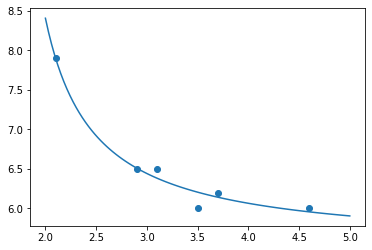

In [21]:
fit_model = lambda x: my_model( x, β0, β1, β2 )
plt.scatter( xs, ys )
plt.plot( many_xs, fit_model( many_xs ) )
plt.show()

```{admonition} Big Picture
---
class: alert alert-primary
---
In mathematical modeling and machine learning, we sometimes distinguish between a *model* and a *fit model.*

 * A *model* is a general purpose technique that you decide might suit the data.  Examples:
    * A linear model, $y=\beta_0+\beta_1x$
    * A quadratic model, $y=\beta_0+\beta_1x+\beta_2x^2$
    * A logistic curve, $y=\frac{\beta_0}{1+e^{\beta_1(-x+\beta_2)}}$
    * A neural network
 * A *fit model* is the specific version of the general model that's been tailored to suit your data.  We create it from the general model by *binding* the values of the $\beta$s to specific numbers.
 
For example, if your model were $y=\beta_0+\beta_1x$, then your fit model might be $y=-0.95+1.13x$.  In the general model, $y$ depends on three variables ($x,\beta_0,\beta_1$).  In the fit model, it depends on only one variable ($x$).  So model fitting is an example of binding the variables of a function.
```

In class, we will use this technique to fit a logistic growth model to COVID-19 data.  Be sure to have completed the preparatory work on writing a function that extracts the series of COVID-19 cases over time for a given state!  Recall that it appears on the final slide of <a href="../../_slides/chapter-8-slides.html">the Chapter 8 slides.</a>